In [2]:
from ml_dl_experiments import settings, show_image_from_source
from IPython.display import Image

# Архитектура YOLOv1 - ...v5. Backbone, Neck, Head

***
Кратко вспомним принцип работы R-CNN: 

1. Сначала специальный алгоритм находил на изображении потенциально интересные области. Обычно их тысячи.
    
2. Затем каждый регион анализировался отдельно, чтобы понять, есть ли там объект.

Это точный подход, но из-за двухступенчатой структуры очень медленный.

YOLO предложил революционную идею — **смотреть на изображение всего один раз. Модель за один проход предсказывает сразу всё: и где находятся объекты, и к какому классу они относятся.**
***

## Backbone-Neck-Head

Утвердился модульный подход — трёхкомпонентная архитектура, которая стала стандартной: Backbone, Neck и Head.

Такая декомпозиция отражает фундаментальные подзадачи, которые должна решать нейросеть:

- **Извлечение признаков (Feature Extraction)**. Нейросеть преобразовывает входное изображение из пиксельного пространства в пространство семантически насыщенных признаков.
- **Агрегирование признаков (Feature Aggregation)**. Нейросеть интегрирует информацию с разных уровней иерархии признаков и представляет её одновременно как глобальный контекст, так и локальные детали.
- **Формирование предсказаний (Prediction Generation)**. Нейросеть преобразовывает обработанные признаки в итоговые результаты: координаты ограничивающих рамок и метки классов.

Компоненты Backbone, Neck и Head воплощают эти идеи: 

- Backbone извлекает признаки, 
- Neck их агрегирует, 
- а Head формирует предсказания.

Такой подход позволяет логически декомпозировать нейросеть, а также работать с каждой частью и улучшать её отдельно. 

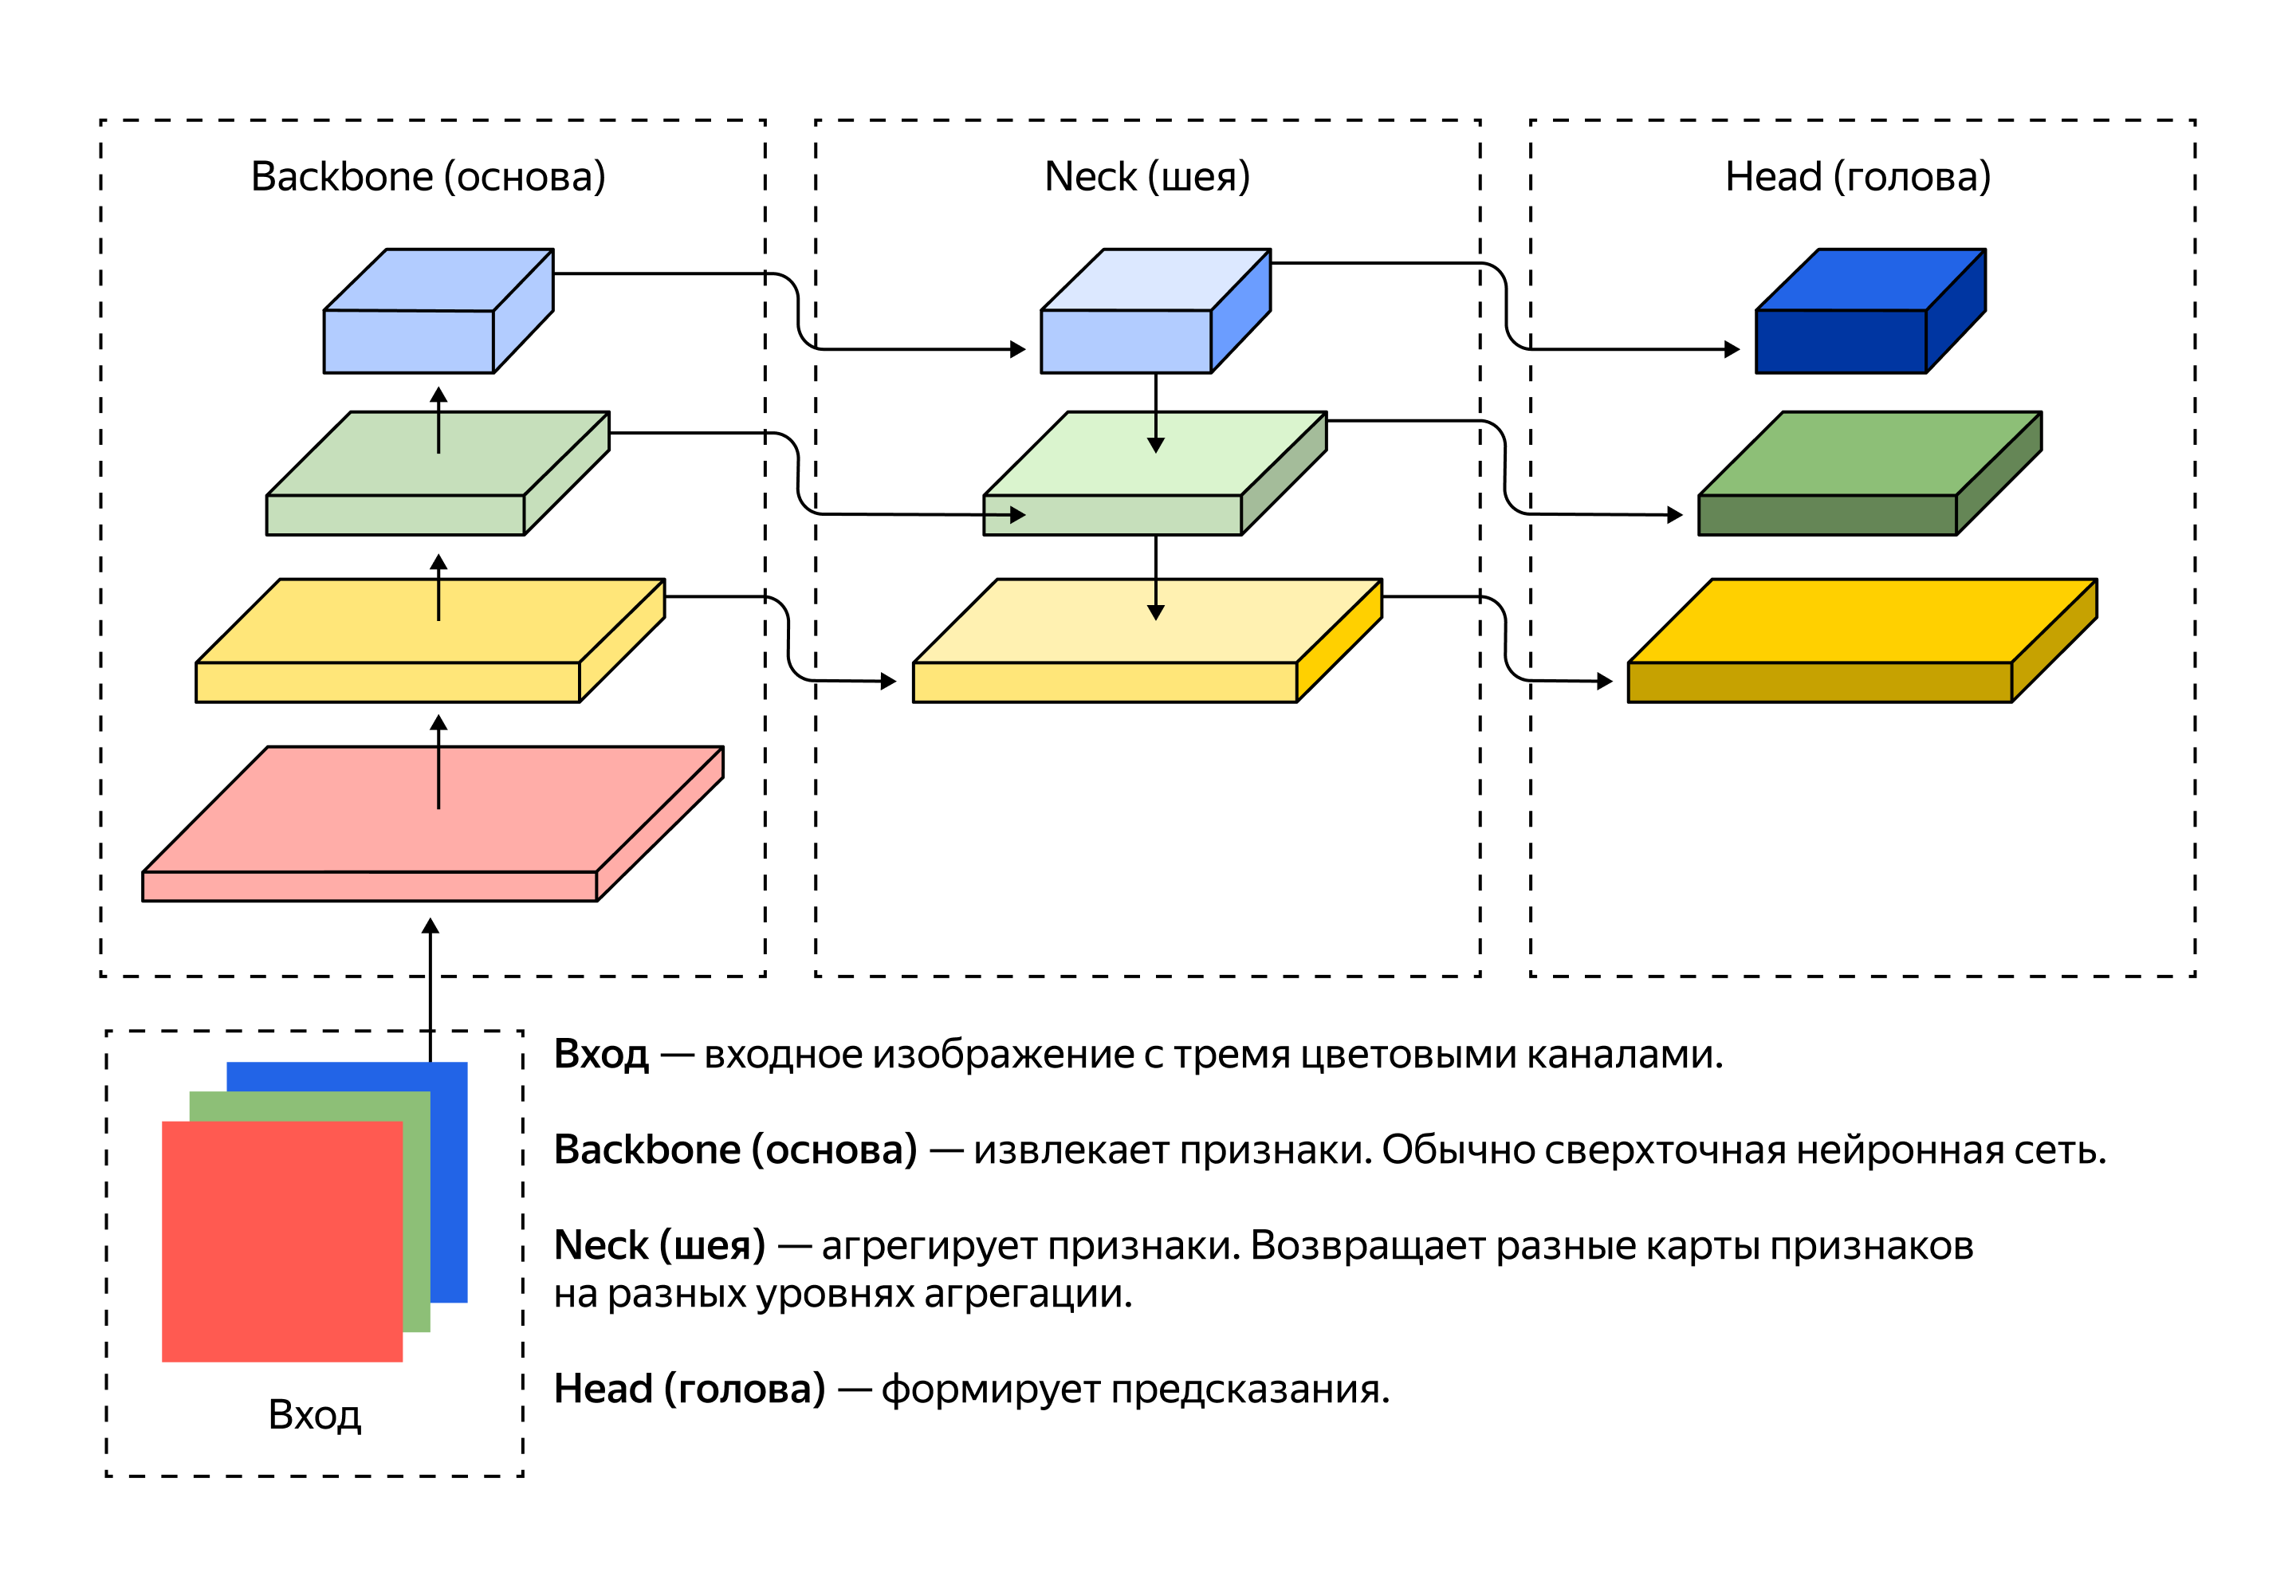

In [5]:
source: str = "ml_dl/cv/bnh1.png"
show_image_from_source(source, width=800)

**Backbone (основа)**

<u>Backbone извлекает признаки.</u> 

Это глубокая свёрточная нейросеть, которая часто предобучена на задачах классификации изображений (например, на датасете ImageNet). 

Основная задача Backbone — **последовательно уменьшать пространственное разрешение входного изображения, одновременно увеличивая глубину или семантическую сложность карт признаков (feature maps).** 

Примеры архитектур: VGG, ResNet, EfficientNet.

**Neck (шея)**

<u>Извлекает и агрегирует признаки.</u> 

Neck — промежуточное звено, которое решает фундаментальную проблему детекторов: как эффективно использовать и признаки для точной локализации (с ранних слоёв Backbone), и признаки для уверенной классификации (с глубоких слоёв). 
**На выходе Neck мы получаем новый набор карт признаков, где каждый уровень обогащён информацией с других уровней.**

**Head (голова)**

<u>Формирует предсказания.</u> 

Голова — это конечный блок, который принимает на вход обработанные карты признаков от «шеи», выполняет на них итоговые свёрточные операции и получает предсказания. 

**Head выдаёт финальный набор предсказаний, который после постобработки становится результатом работы детектора.**

Простой пример архитектуры головы — FC-слой с softmax на конце.  